In [86]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import os

In [87]:
f1 = 7999/10499

In [88]:
f2 = 2500/10499
f2

0.23811791599199925

In [89]:
gini = f1*(1-f1) + f2*(1-f2)
gini

0.36283554815125285

In [90]:
hr = pd.read_csv(r"C:\Hogwarts\machine_learning\Cases\human-resources-analytics\HR_comma_sep.csv")

In [91]:
dum_hr = pd.get_dummies(hr,drop_first=True)

In [92]:
X = dum_hr.drop('left',axis = 1)
y = dum_hr['left']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [94]:
dtc = DecisionTreeClassifier(random_state= 2022,
                            max_depth = 3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2022)

In [113]:
plt.figure(figsize = (40,20))
        
plot_tree(dtc,feature_names = X.columns,
         class_names = ['0','1'], fontsize = 14)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 4000x2000 with 0 Axes>

In [96]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.9526666666666667


In [97]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test , y_pred))

0.9403689734861572


gridsearch

In [98]:
dtc = DecisionTreeClassifier(random_state= 2022)

In [99]:
param = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [106]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [107]:
gcv  = GridSearchCV(dtc , param_grid = param, verbose=3,
                   cv = kfold,scoring='roc_auc')
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.906 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.970 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.971 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.975 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.968 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.970 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.970 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.971 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.975 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.968 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=1, min_samples_split=5;, score=0.970 total time=   0.0s
[CV 1/5] E

[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.975 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.973 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.980 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.976 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.977 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.978 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.977 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.983 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.979 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.981

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc', verbose=3)

In [108]:
print(gcv.best_params_)

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [109]:
print(gcv.best_score_)

0.9852312475055124


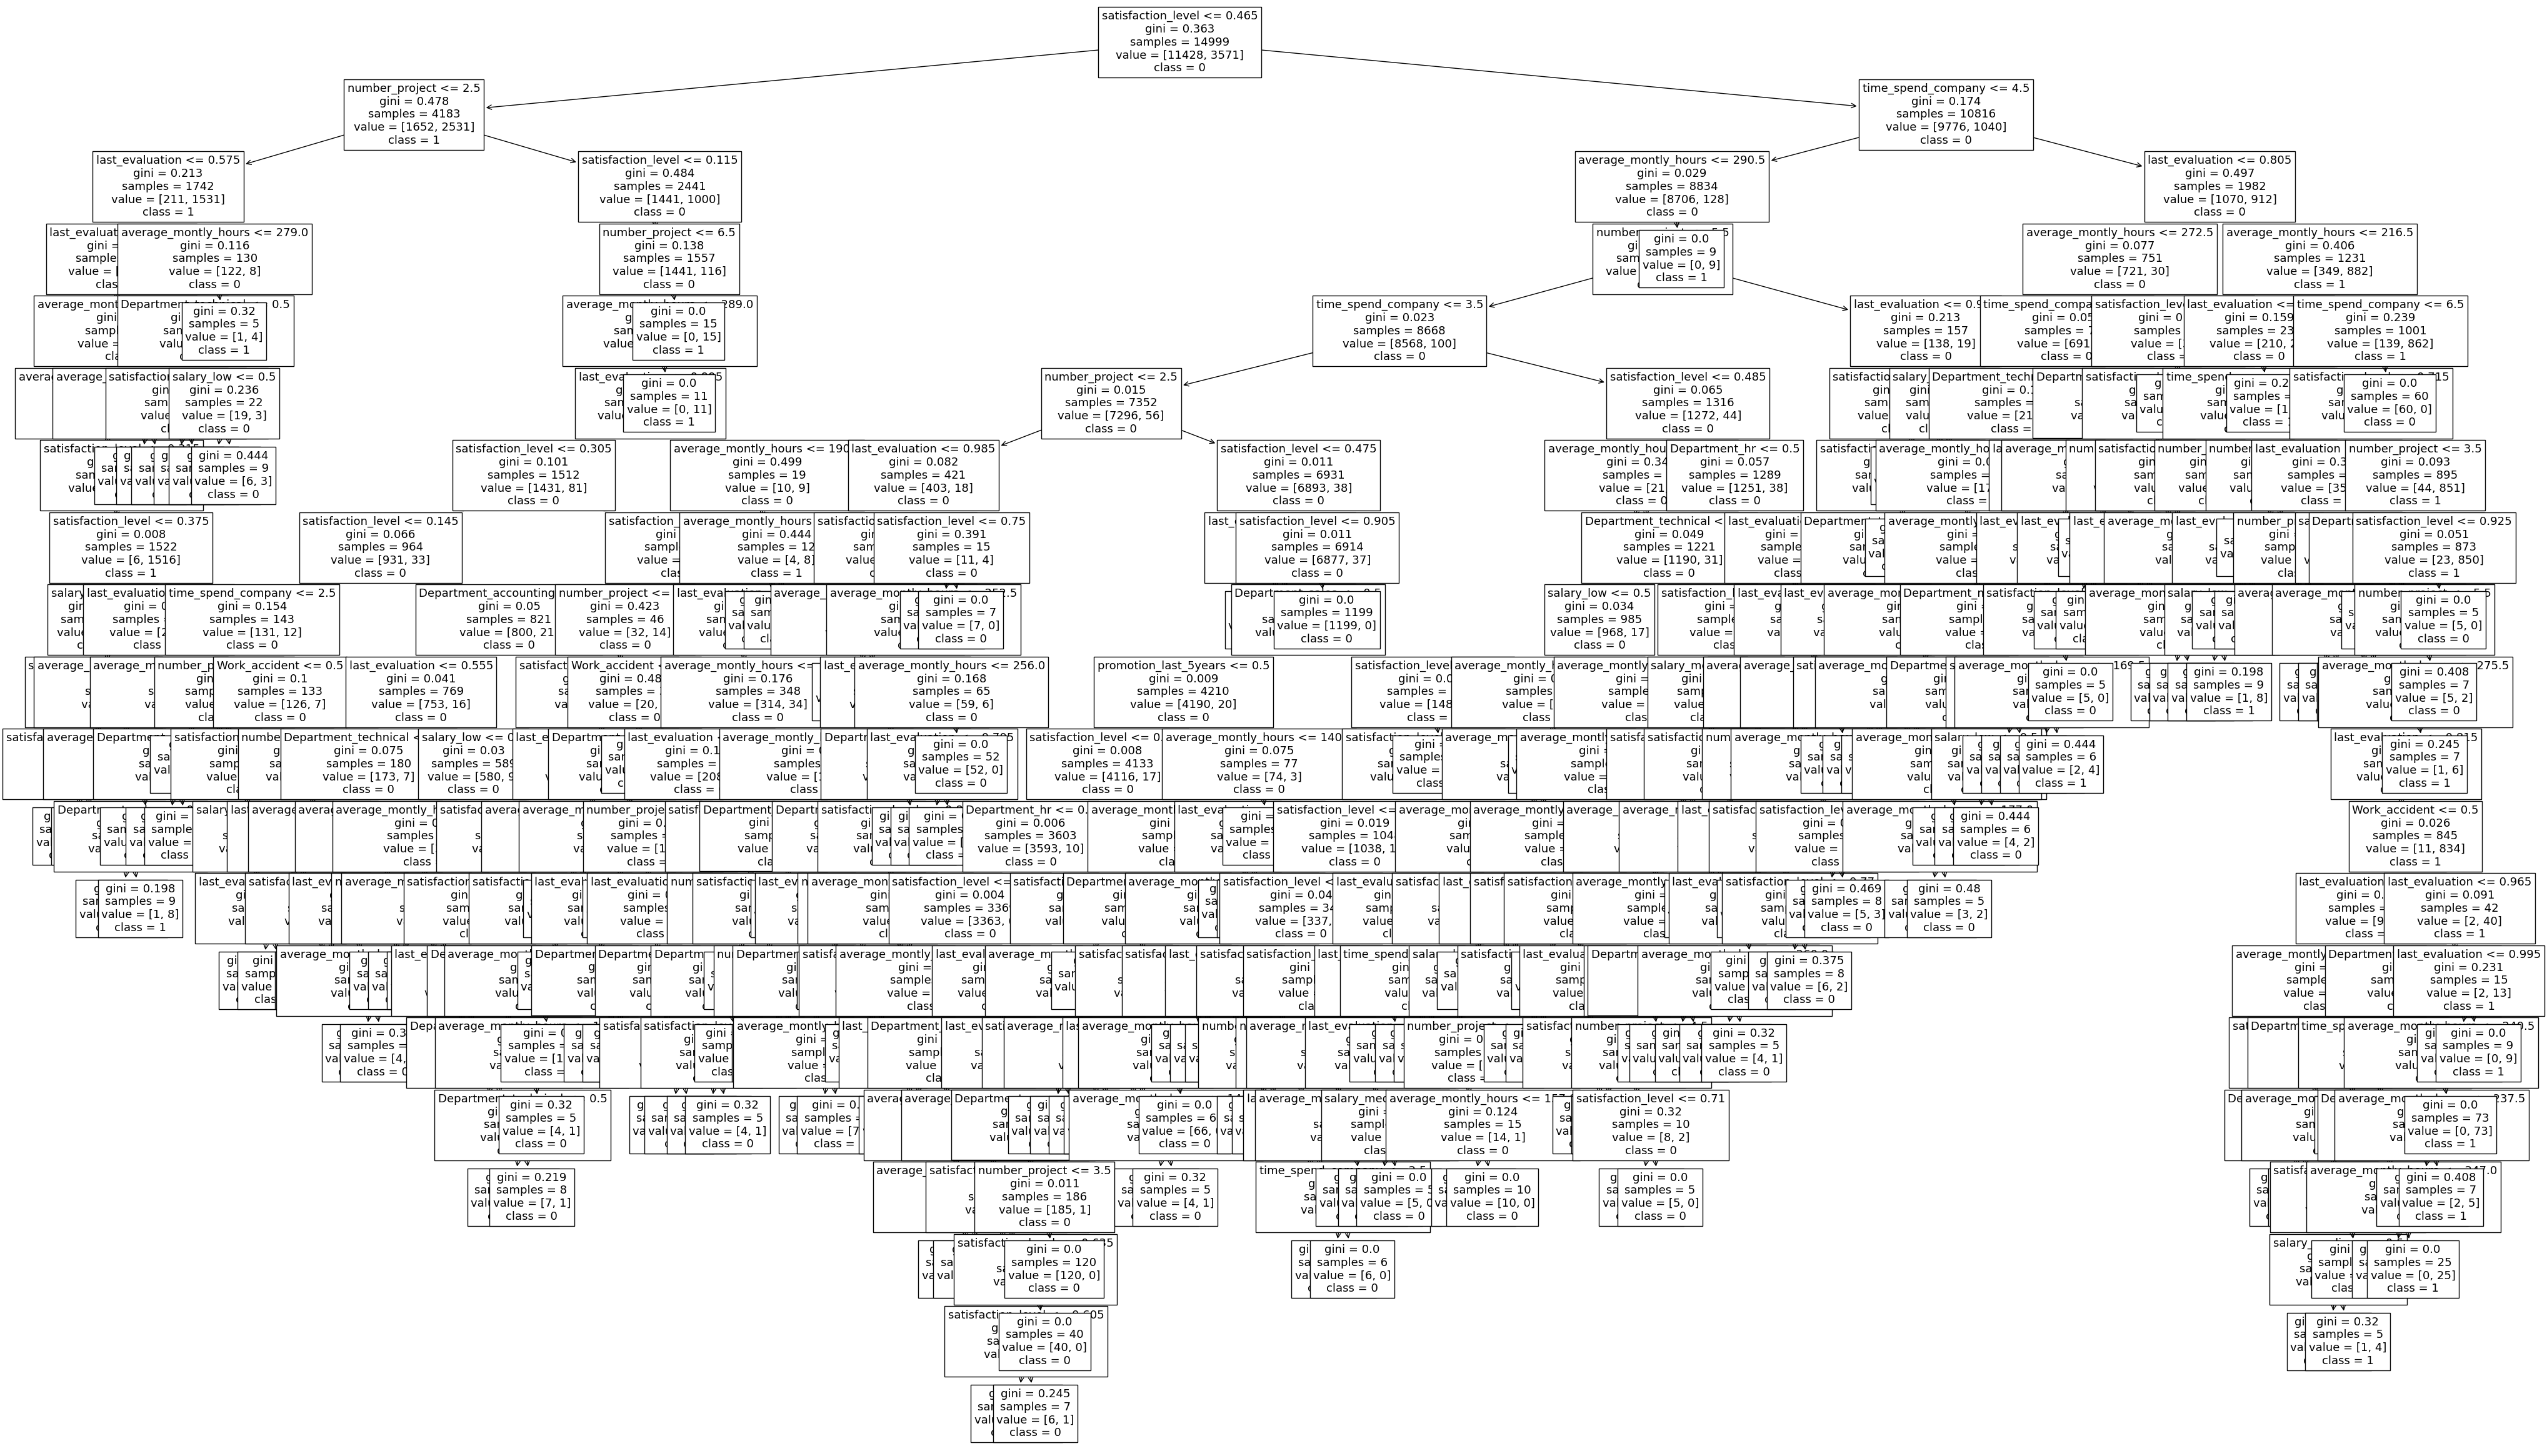

In [110]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names=X.columns,class_names=['0','1'],fontsize= 13)
plt.show()
